# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS
<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1nW_7p_LyFhbR0ipjSekPcAj6kDoyK73R' width="800"></center>

Este notebook faz parte da aula 05 do curso [IAD-001](https://alunoweb.net/moodle/pluginfile.php/140418/mod_resource/content/6/EST_04_Y2024.pdf).

# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Normas

Normas são características importantes que definem um vetor em um único valor. São quaisquer funções, definidas por barras horizontais $\|\boldsymbol{u}\|$, que são caracterizadas pelas seguintes propriedades:

1. Normas são valores não negativos. Se você pensar nas normas como um comprimento, verá facilmente por que não pode ser negativo;

2. As normas são $0$ se e somente se o vetor é um vetor zero;

3. As normas respeitam a desigualdade $\|{\boldsymbol{u}+\boldsymbol{v}}\| \leq \|{\boldsymbol{u}}\|+\|{\boldsymbol{v}}\|$;

4. A norma de um vetor multiplicado por um escalar $\alpha$ é igual ao valor absoluto desse escalar multiplicado pela norma do vetor, $\|\alpha \boldsymbol{u}\|= |\alpha| \|{\boldsymbol{u}}\|$.

De maneira geral,

$$
|| x ||_p = \left(\sum_i |x_i|^p\right)^{1/p}
$$


## Norma L1

Para $p=1$ tem-se a norma dita $L^1$:

$$
L^1 = || x ||_1 = \sum_i |x_i| = |x_1| + |x_2| + \ldots + |x_i|
$$

## Norma L2

Para $p=2$ tem-se a norma dita $L^2$:

$$
L^2 = || x ||_2 = \sqrt{\left(\sum_i x_i^2\right)} = \sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}
$$


## Norma Linf

Para $p=\infty$ tem-se a norma dita $L^\infty$:

$$
L^\infty = \max_i|x_i|
$$

In [2]:
#Norma L1
v = np.array([-1, -2, 3, 4, 5])
np.linalg.norm(v,1)

15.0

In [3]:
# Norma L2
v = np.array([-1, -2, 3, 4, 5])
np.linalg.norm(v,2)
#

7.416198487095663

In [4]:
#Norma Linfty
v = np.array([-1, -2, 3, 4, 5])
np.linalg.norm(v,np.inf)

5.0

In [5]:
X,Y = np.meshgrid(np.arange(-2, 2, .1), np.arange(-2, 2, .1))
print('vetor X\n',X,'\n')
print('vetor Y\n',Y,'\n')

vetor X
 [[-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 ...
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]
 [-2.  -1.9 -1.8 ...  1.7  1.8  1.9]] 

vetor Y
 [[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.7  1.7  1.7 ...  1.7  1.7  1.7]
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]] 



In [6]:
Z=[X,Y]
print(np.shape(Z))

(2, 40, 40)


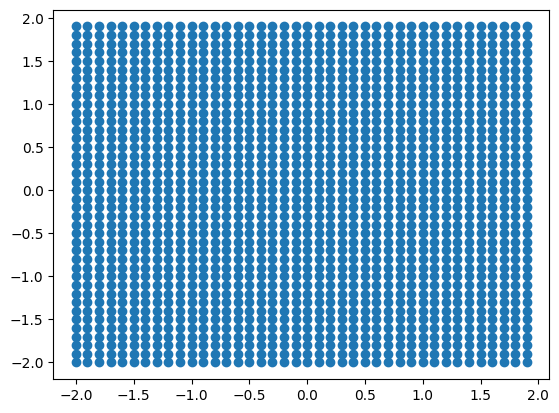

In [7]:
plt.scatter(X, Y, marker='o');

In [8]:
Z_L1 = np.linalg.norm(Z,1, axis=0) # np.abs(X)+np.abs(Y)
Z_L2 = np.linalg.norm(Z,2, axis=0) # np.sqrt(X**2+Y**2)
Z_L2_2 = np.square(np.linalg.norm(Z,2, axis=0)) # X**2+Y**2
Z_inf = np.linalg.norm(Z,np.inf, axis=0) # np.amax([np.absolute(X),np.absolute(Y)], axis=0)

In [9]:
def makeplot(position,angle1,angle2,rotation,alpha,Z,L=1):
    ax = fig.add_subplot(position,projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = alpha)
    ax.view_init(angle1,angle2)
    ax.set_xlabel(r'$x_1$', fontsize=12, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=12, labelpad=10)
    ax.zaxis.set_rotate_label(False)
    if L ==1:
      ax.set_zlabel(r'$L^1$', rotation=rotation, fontsize=12, labelpad=0.2)
    elif L == 2:
      ax.set_zlabel(r'$L^2$', rotation=rotation, fontsize=12, labelpad=0.2)
    elif L == 3:
      ax.set_zlabel(r'$L^\infty$', rotation=rotation, fontsize=12, labelpad=0.2)
    else:
      ax.set_zlabel(r'$L$', rotation=rotation, fontsize=12, labelpad=0.2)
    return ax

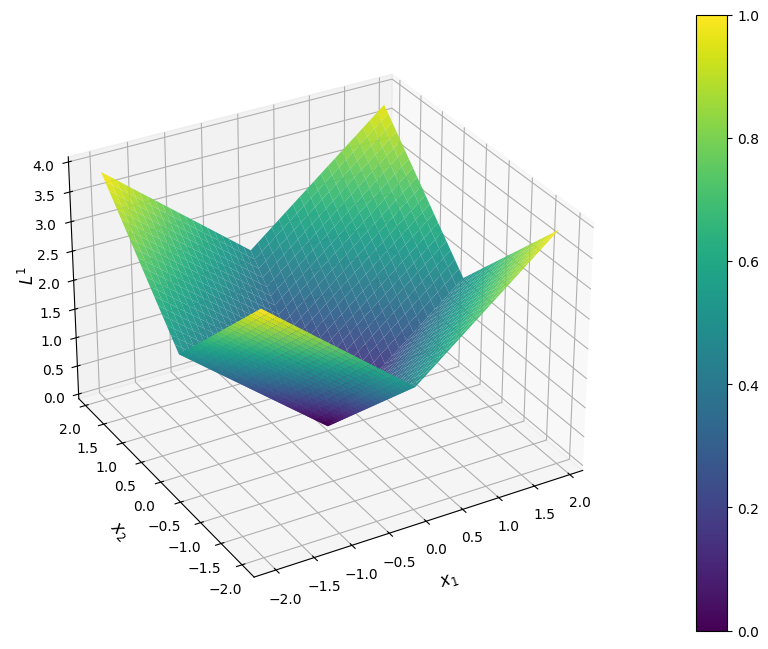

In [10]:
fig = plt.figure(figsize=(40,8))
ax = makeplot(121,30,-120,90,0.95,Z_L1)
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax = ax)
ax.set_box_aspect(aspect=None, zoom=0.95)
plt.show()

In [11]:
fig.get_size_inches()

array([40.,  8.])

In [45]:
fig = plt.figure(figsize=(40,8))
ax1 = makeplot(121,30,-60,100,0.6,Z_L2, L=2)
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax = ax1)
ax.set_box_aspect(aspect=None, zoom=0.95)
plt.show()
fig = plt.figure(figsize=(40,8))
ax2 = makeplot(122,30,-60,100,0.6,Z_L2_2, L=2)
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax = ax2)
ax.set_box_aspect(aspect=None, zoom=0.95)
plt.show()

TypeError: makeplot() got an unexpected keyword argument 'L'

<Figure size 4000x800 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(40,8))
ax = makeplot(121,30,-60,100,0.6,Z_inf,L=3)
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax = ax)
ax.set_box_aspect(aspect=None, zoom=0.95)
plt.show()

TypeError: makeplot() got an unexpected keyword argument 'L'

<Figure size 4000x800 with 0 Axes>

## Vizualizando os círculos da norma $p$

A norma L1 é formalmente definida como a soma do valor absoluto das coordenadas de um vetor. __Então, por que o diamante?__

A norma L2 é formalmente definida como o quadrado da diferença das coordenada de um vetor. __Então, por que o círculo?__

A norma L∞ é formalmente definida como a dimensão absoluta máxima das coordenada de um vetor. __Então, por que o quadrado?__

<center><img src='https://drive.google.com/uc?export=view&id=14CLkD07pBj77LrvOBENlGVuq5VDP54aE' width="120"></center>

In [47]:
Circulo =np.array([[1,0],[0,1],[np.cos(np.deg2rad(45)),np.sin(np.deg2rad(45))],[np.cos(np.deg2rad(60)),np.sin(np.deg2rad(60))]])
np.shape(Circulo)

(4, 2)

In [48]:
C_L1 = np.array([[1,0],[0.75,0.25],[0.5,0.5],[0.25,0.75],[0,1]])
C_L2 = np.array([[1,0],[0,1],[np.cos(np.deg2rad(30)),np.sin(np.deg2rad(30))],[np.cos(np.deg2rad(45)),np.sin(np.deg2rad(45))],[np.cos(np.deg2rad(60)),np.sin(np.deg2rad(60))]])
C_Linf = np.array([[1,0],[1,0.5],[1,1],[0.5,1],[0,1]])
print(np.linalg.norm(C_L1,1, axis=1))
print(np.linalg.norm(C_L2,2, axis=1))
print(np.linalg.norm(C_Linf,np.inf, axis=1))

[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


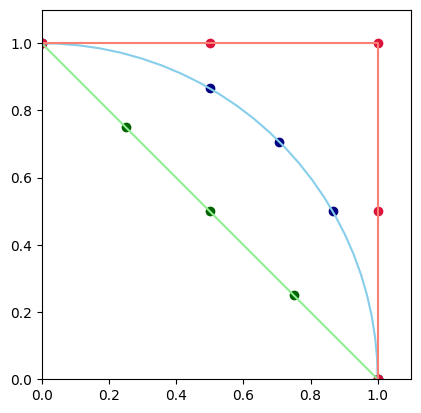

In [49]:
colormap = ('lightgreen', 'darkgreen','skyblue','navy','salmon','crimson','mistyrose','palevioletred')
#diamante
plt.plot(    [1, 0],
    [0, 1],
    color = colormap[0])
#círculo
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
r = 1.
xs = r * np.cos(angles)
ys = r * np.sin(angles)
plt.plot(xs, ys , color = colormap[2])
#quadrado
plt.plot(
    [1, 1, 0],
    [0, 1, 1],
    color = colormap[4]
)

for j,a in enumerate([C_L1, C_L2, C_Linf]):
  plt.scatter( a[:,0], a[:,1],color = colormap[2*j+1])

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.gca().set_aspect('equal')
plt.show()

# Derivada

Derivadas são muito importantes em problemas de otimização. Elas nos dizem como alterar as entradas de uma função de maneira a aumentar ou diminuir sua saída da função, para que possamos nos aproximar do mínimo ou máximo da função.

Porém, lembrar exatamente como diferenciar equações pode ser um desafio. Ou, talvez, você tenha uma equação longa e complicada que deva derivar. Dependendo da equação, você pode levar de 10 a 15 minutos para fazer isso manualmente.

Vamos conhecer, então, a biblioteca `SymPy` em Python, que pode fazer todo esse trabalho pesado para nós. Ela tem tudo o que precisamos para derivar. Essa biblioteca também integra, resolve sistema de equações, simplifica equações...  mas tudo isso está fora do nosso escopo aqui!

Como exemplo, suponha a função:
$$
f(x,y)=xy+x^2+\sin{2y}
$$

Usando a biblioteca `SymPy`, encontre:
* a primeira derivada da função $f(x,y)$ com respeito a $x$;
* a segunda derivada da função $f(x,y)$ com respeito a $y$.


In [90]:
import sympy

In [91]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

In [92]:
# Criando a equação
f = x * y + x ** 2 + sympy.sin(2 * y)

In [93]:
# Primeira derivada com respeito a x
df_dx = sympy.diff(f, x)
print("A derivada de f(x,y) com respeito a x é: " + str(df_dx))

A derivada de f(x,y) com respeito a x é: 2*x + y


In [94]:
# Segunda derivada comr espeito a y
d2f_dy2 = sympy.diff(f, y, 2)
print("A segunda derivada de f(x,y) com respeito a y é: " + str(d2f_dy2))

A segunda derivada de f(x,y) com respeito a y é: -4*sin(2*y)


#Gradiente

O gradiente é a generalização da derivada para funções multivariadas. Ele captura a inclinação local da função, permitindo prever o efeito de dar um pequeno passo de um ponto em qualquer direção.

<center><img src='https://drive.google.com/uc?export=view&id=1xD6tvXQPF5WZW3dJUb9iJXNJeONBzgXA' width="800"></center>


Ou seja, no caso de uma função univariada, é simplesmente a primeira derivada em um ponto selecionado.

No caso de uma função multivariada, é um vetor de derivadas em cada direção (ao longo dos eixos das variáveis).



In [95]:
def makeplot(position,angle1,angle2,rotation,alpha):
    ax = fig.add_subplot(position,projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = alpha)
    ax.view_init(angle1,angle2)
    ax.set_xlabel(r'$x_1$', fontsize=12)
    ax.set_ylabel(r'$x_2$', fontsize=12)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$f(x_1,x_2)$', rotation=rotation, fontsize=12, labelpad=2)
    return ax

In [96]:
def f(x, y):
    return x*np.exp(-x**2 - y**2)

In [97]:
X,Y = np.meshgrid(np.arange(-2, 2, .1), np.arange(-2, 2, .1))
Z = f(X, Y)

AttributeError: 'numpy.ndarray' object has no attribute 'Normalize'

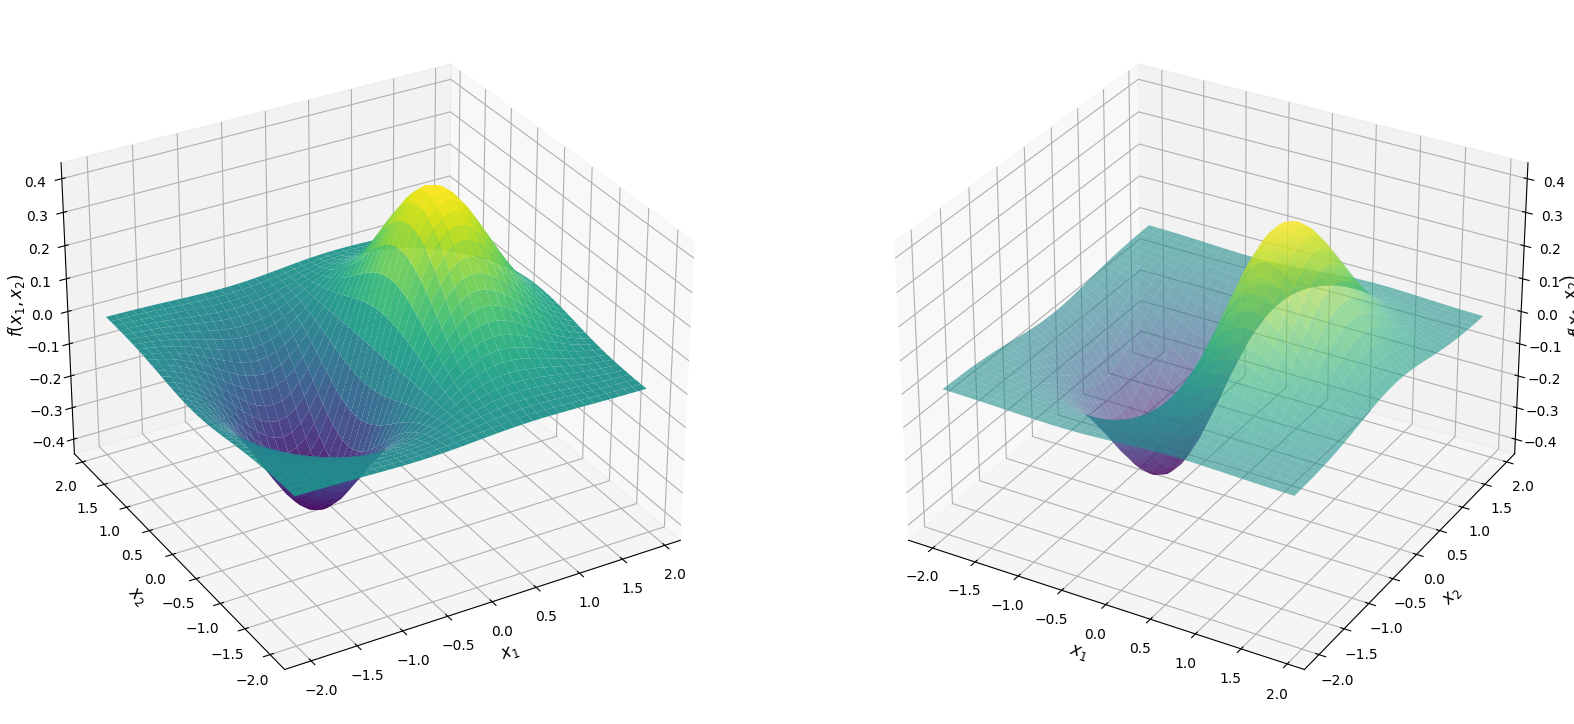

In [98]:
fig = plt.figure(figsize=(20,10))
ax1 = makeplot(121,30,-120,90,0.95)
ax2 = makeplot(122,30,-60,100,0.6)

norm = colors.Normalize(np.min(Z), np.max(Z))
cbar_ax = fig.add_axes([0.5, 0.5, 0.01, 0.38])
fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap='viridis'), cax=cbar_ax, ax = ax2)

ax1.set_box_aspect(aspect=None, zoom=0.95)
ax2.set_box_aspect(aspect=None, zoom=0.95)
plt.show()

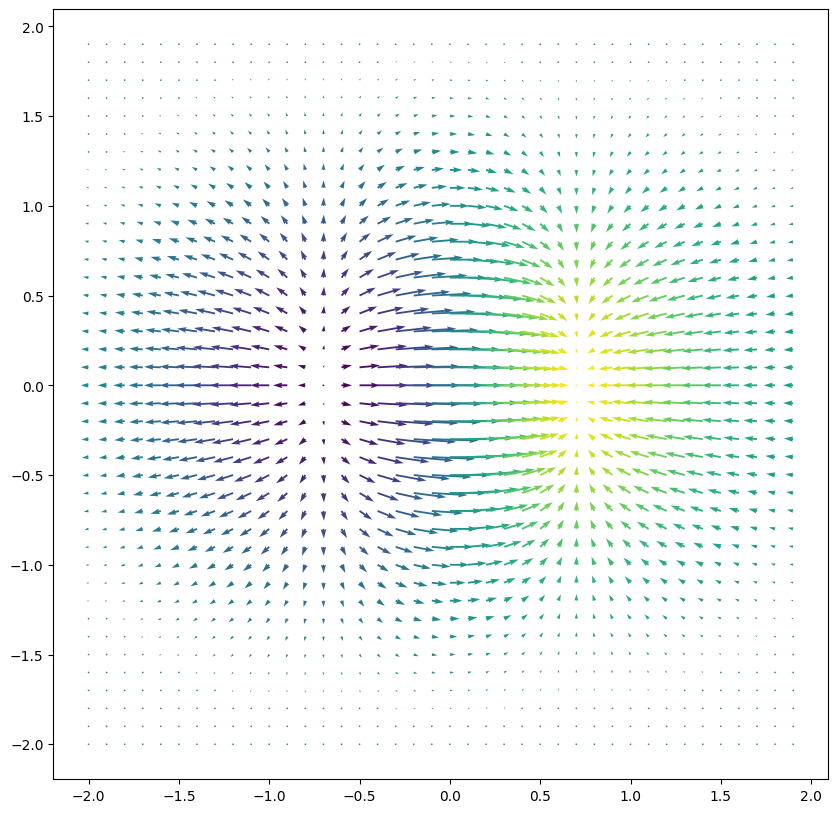

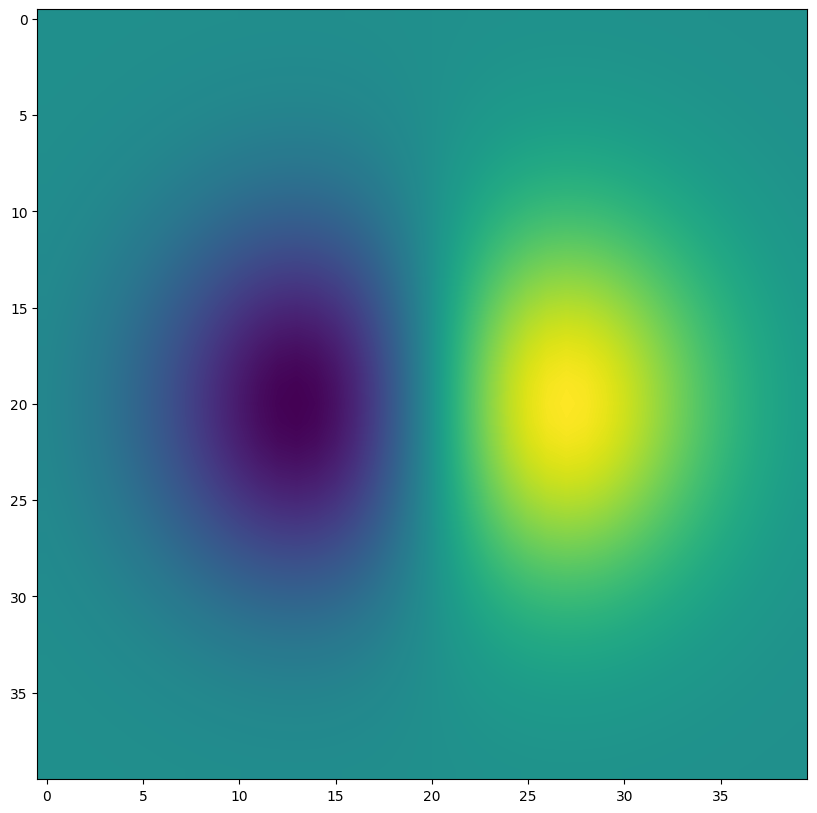

In [99]:
V,U = np.gradient(Z, .2, .1)
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap()
q = ax.quiver(X,Y,U,V, Z, cmap = 'viridis')
plt.show();
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(Z, interpolation='bilinear');

Veja o exemplo dos slides,
$$
f(x_1,x_2)=x_1^2+x_2^2
$$

In [100]:
def f(x, y):
    return x**2 + y**2

In [101]:
X,Y = np.meshgrid(np.arange(-8, 8, .3), np.arange(-8, 8, .3))
Z = f(X, Y)

AttributeError: 'numpy.ndarray' object has no attribute 'Normalize'

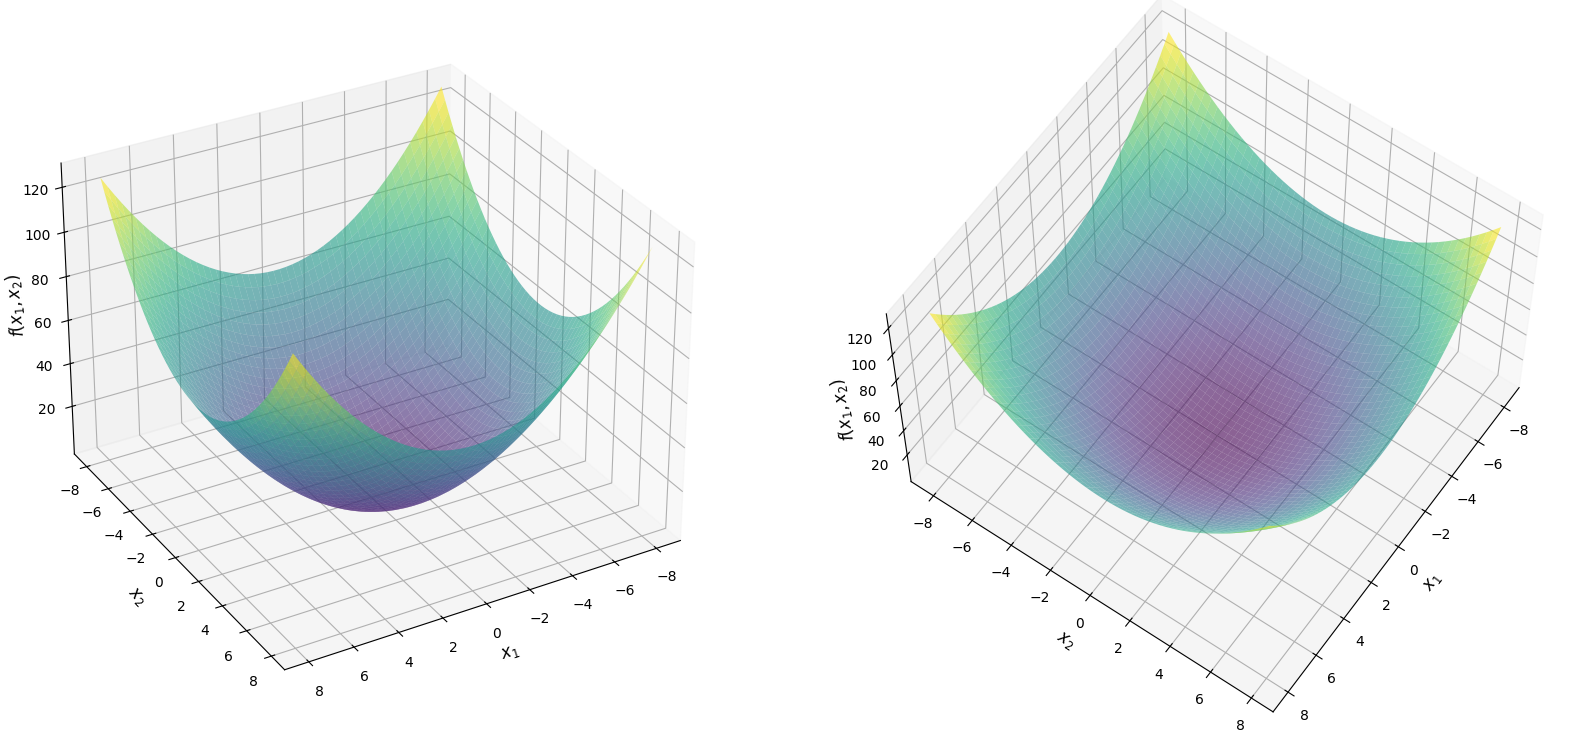

In [102]:
fig = plt.figure(figsize=(20,10))

def makeplot(position,angle1,angle2,rotation):
    ax = fig.add_subplot(position,projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = 0.6)
    ax.view_init(angle1,angle2)
    ax.set_xlabel(r'$x_1$', fontsize=12)
    ax.set_ylabel(r'$x_2$', fontsize=12)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$f(x_1,x_2)$', rotation=rotation, fontsize=12, labelpad=2)
    return ax

ax1 = makeplot(121,30,60,95)
ax2 = makeplot(122,60,35,100)
norm = colors.Normalize(np.min(Z), np.max(Z))
cbar_ax = fig.add_axes([0.5, 0.5, 0.01, 0.38])
fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap='viridis'), cax=cbar_ax, ax = ax2)

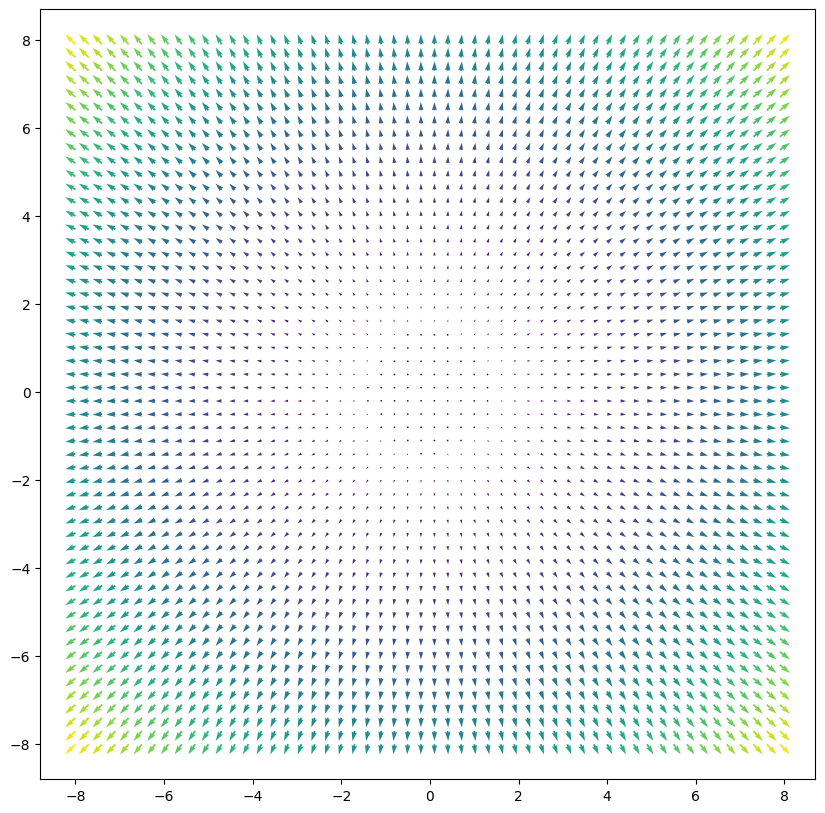

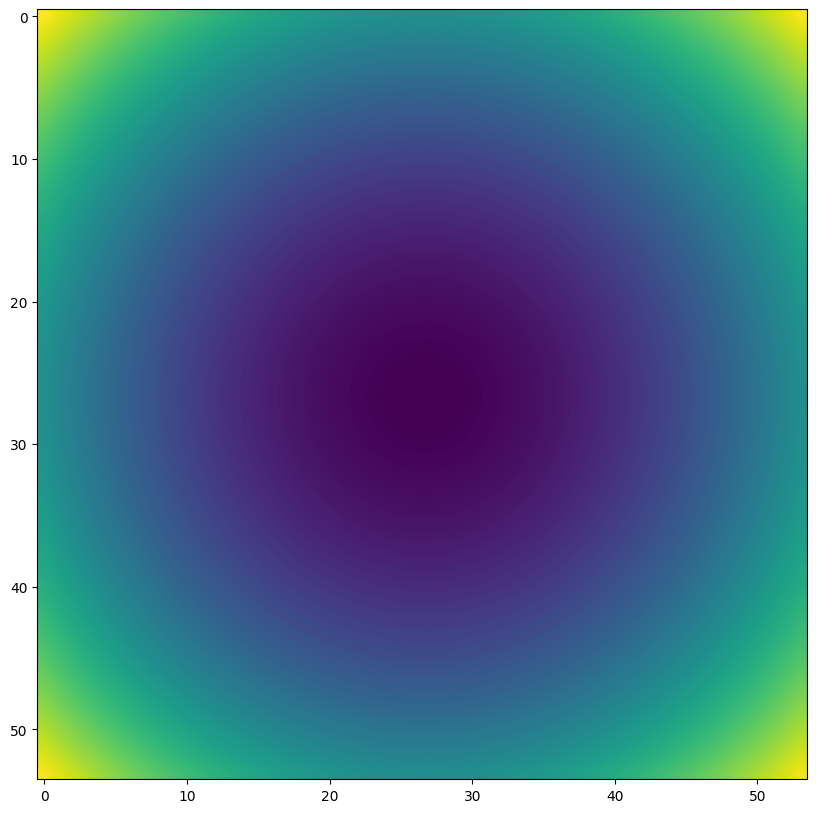

In [ ]:
V,U = np.gradient(Z, 1,1)
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap()
q = ax.quiver(X,Y,U,V, Z, cmap = 'viridis')
plt.show();
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(Z, interpolation='bilinear');

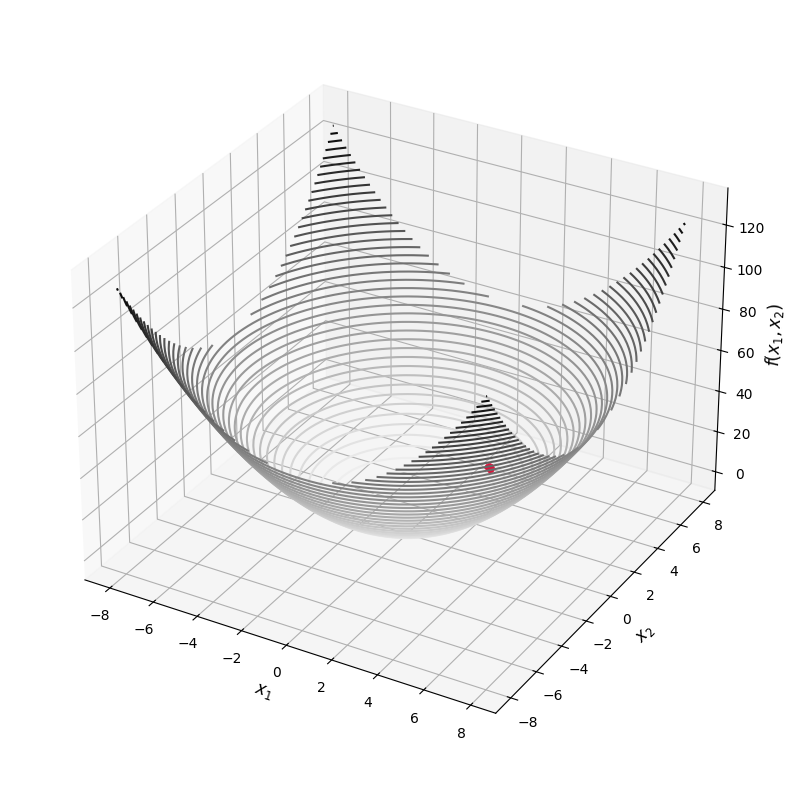

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
x0,y0 = 2,3
z0=x0**2+y0**2
ax.scatter(x0, y0, z0, color='crimson', linewidth=0.5, s=50)
ax.set_box_aspect(aspect=None, zoom=0.95)
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_zlabel(r'$f(x_1,x_2)$',fontsize=12);

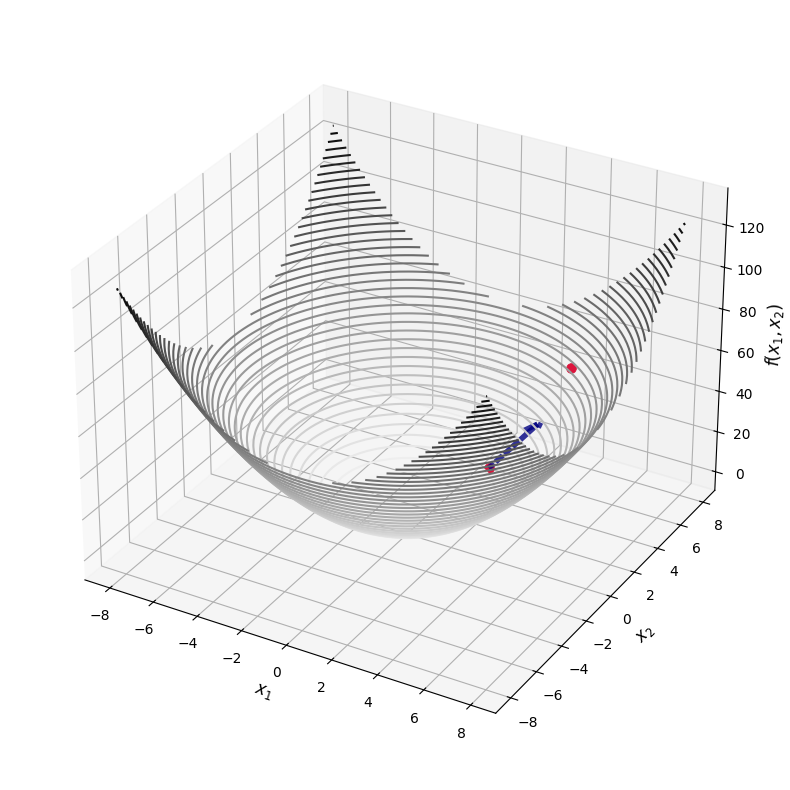

In [103]:
fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
x0,y0 = 2,3
z0=x0**2+y0**2
ax.scatter(x0, y0, z0, color='seagreen', linewidth=0.5)
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_zlabel(r'$f(x_1,x_2)$',fontsize=12)
x0,y0 = 2,3
z0=x0**2+y0**2
x1,y1 = 2*x0,2*y0
z1 = x1**2+y1**2
u=(x1-x0)
v=(y1-y0)
w=(z1-z0)
N = np.sqrt(u**2+v**2+w**2)  # there may be a faster numpy "normalize" function
uN,vN,wN = u/N,v/N,w/N
ax.scatter(x0, y0, z0, s=50, color = 'crimson', linewidth=0.5)
ax.set_box_aspect(aspect=None, zoom=0.95)

ax.quiver(
        x0,y0,z0, # <-- starting point of vector
        x1,y1,z1, # <-- directions of vector
        length=0.3, linewidth = 4,
        color = 'navy', alpha = .8, arrow_length_ratio=0.1
    )

ax.scatter(x1, y1, z1, color = 'crimson', s=50, linewidth=0.5);


E um gráfico 4D? Ainda dá para ver....

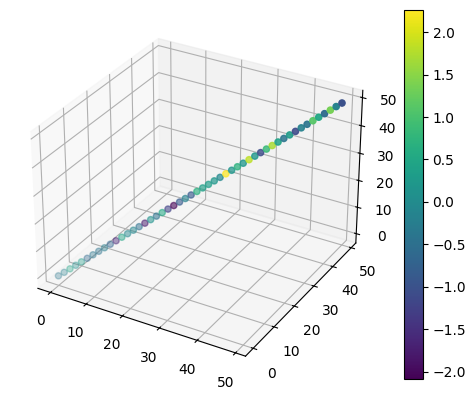

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(range(0, 50))
y = np.array(range(0, 50))
z = np.array(range(0, 50))
colors = np.random.standard_normal(len(x))
img = ax.scatter(x, y, z, c=colors, cmap='viridis')
fig.colorbar(img)
plt.show()

# Otimização

Muitos algoritmos em aprendizado de máquina otimizam uma função objetivo em relação a um conjunto de parâmetros de modelo desejados que controlam quão bem um modelo explica os dados. __Encontrar bons parâmetros pode ser formulado como um problema de otimização.__


In [105]:
def makeplot(position,angle1,angle2,rotation,alpha):
    ax = fig.add_subplot(position,projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = alpha)
    ax.view_init(angle1,angle2)
    ax.set_xlabel(r'$\omega_0$', fontsize=12)
    ax.set_ylabel(r'$\omega_1$', fontsize=12)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$f(\omega_0,\omega_1)$', rotation=rotation, fontsize=12, labelpad=2)
    return ax

In [106]:
def f(x, y):
    return np.sin(x)+x*np.cos(np.sqrt(2)*x)+y*np.sin(y)

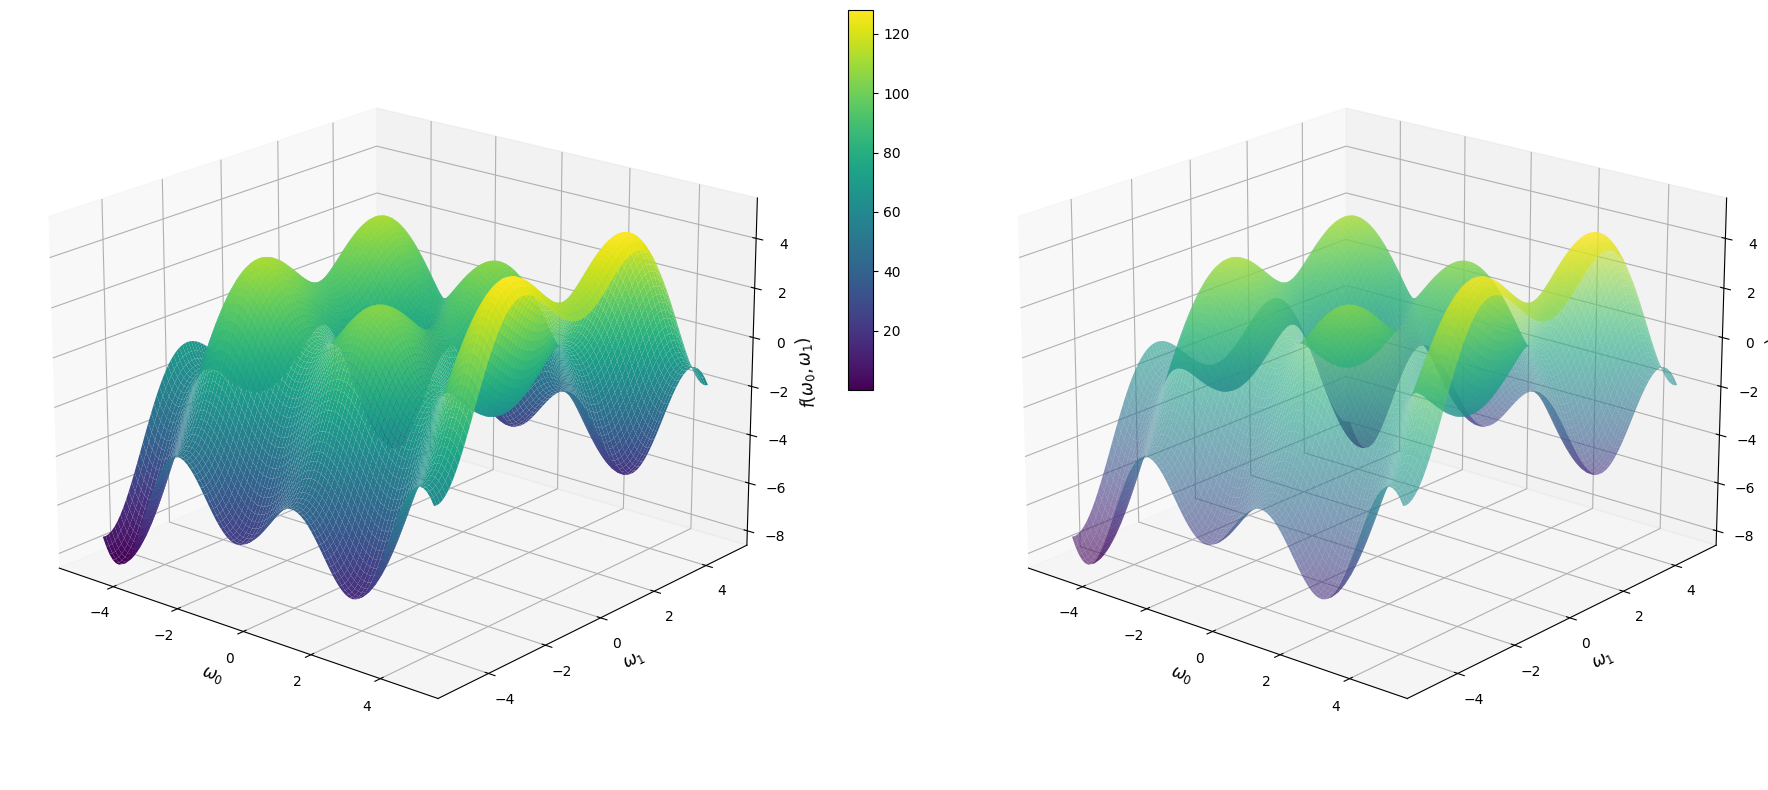

In [107]:
X,Y = np.meshgrid(np.arange(-5, 5, .1), np.arange(-5, 5, .1))
Z = f(X, Y)

fig = plt.figure(figsize=(25,10))
ax1 = makeplot(121,20,-50,95,1)
ax2 = makeplot(122,20,-50,95,0.6)
plt.subplots_adjust(wspace = 0.001 )
cbar_ax = fig.add_axes([0.5, 0.5, 0.01, 0.38])
fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap='viridis'), cax=cbar_ax, ax = ax2)
ax.set_box_aspect(aspect=None, zoom=0.95)
plt.show()

C:\Users\knd\AppData\Local\Temp\ipykernel_27768\1600997591.py:3: UserWarning: The following kwargs were not used by contour: 'facecolors'
  ax.contourf(X,Y,Z, facecolors=colors);


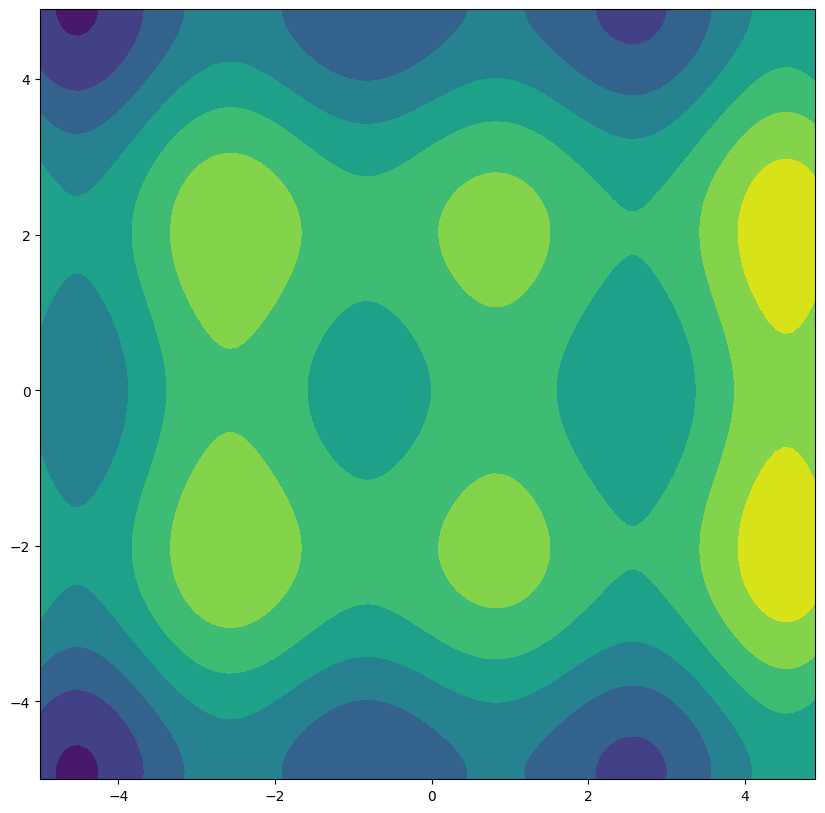

In [108]:
colors = mpl.cm.jet(np.hypot(X,Y))
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(X,Y,Z, facecolors=colors);

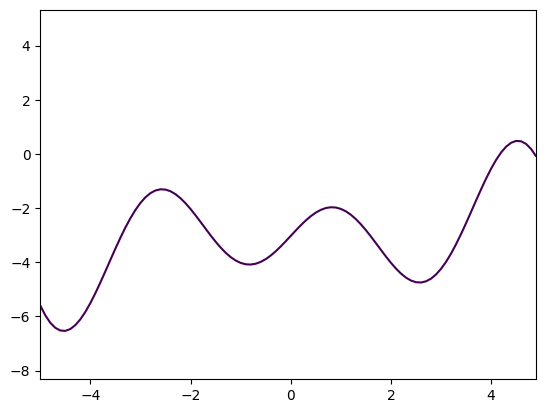

In [109]:
fig = plt.figure()
ax = plt.axes()
ax.contour(X,Z, Y, [-4])

## Regressão multilinear

A regressão multi-linear trata da relação de uma variável dependente com *múltiplas* variáveis independentes.

\begin{equation}
y_i = \omega_0 + \omega_1 x_{i,1} + \omega_2 x_{i,2} +\ldots + w_m x_{i,m}
\end{equation}

seja

\begin{equation}
\boldsymbol{y} = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_n\end{bmatrix}
\end{equation}

 um vetor com uma amostra do conjunto de variáveis independentes e

\begin{equation}
\boldsymbol{X} = \begin{bmatrix}1 & x_{1,1} & x_{1,2} & \ldots & x_{1,m} \\ 1 &
x_{2,1} & x_{2,2} & \ldots & x_{2,m} \\ 1 &
 \vdots & \vdots & \ddots & \vdots & \vdots\\ 1 &
x_{n,1} & x_{n,2} & \ldots & x_{n,m} \end{bmatrix}
\end{equation}

uma matriz $n \times (m+1)$ cuja  *primeira* coluna é composta da constante $1$ e as $m$ próximas colunas são compostas por uma amostra de cada uma das $m$ variáveis independetes.

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
\boldsymbol{y} =  \boldsymbol{X \omega} \tag{1}
\end{equation}

Onde:

\begin{equation}
\boldsymbol{\omega} = \begin{bmatrix}
w_0\\
w_1\\
w_2\\
\vdots\\
w_m
\end{bmatrix}
\end{equation}

é o vetor  de $(m+1)$ componentes dos coeficientes de cada uma das variáveis
independentes. Note que nessa notação o coeficiente $w_0$ é o *primeiro* coeficiente (há notações distintas nas quais ele é o último). $\boldsymbol{e}$ é o vetor de *resíduos* (a diferença entre o modelo real e os dados realmente observados).

Em muitas situações, não conseguiremos encontrar um vetor $\boldsymbol{y}$, tal que satisfaça a equação (1). Então, em vez disso, nos contentaremos em encontrar um vetor $\boldsymbol{\omega}$ tal que $\boldsymbol{X\omega}$ seja o mais próximo possível $\boldsymbol{y}$, medido pelo quadrado da norma,

\begin{equation}
\|\boldsymbol{y}-\boldsymbol{X\omega}\|^2
\end{equation}

A solução ótima $\boldsymbol{\omega}^*$ foi desenvolvida em aula e pode ser escrita como:
\begin{equation}
\boldsymbol{\omega}^*=\left(\boldsymbol{X}^T \boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
\end{equation}

e a matriz $\left(X^T X\right)^{-1}X^T$ é dita a *pseudo-inversa* de $X$.

*Nota*: Em geral não é eficiente calcular explicitamente esta matriz.

## Exemplo do slide

<center><img src='https://drive.google.com/uc?export=view&id=1xo7HfEOAgttK7JlfZL6y2eH-YMLiB4Sz' width="600"></center>

Com dados extraídos do [link](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset), encontre os parâmetros ótimos para a previsão do preço de um imóvel. Primeiramente, considere apenas um parâmetro – dimensão – depois, aumente e inclua os demais. Compare os resultados.



Veja a tabela completa...

Mas vamos trabalhar com os poucos dados destacados na tabela abaixo, somente para ilustração.


Casa  | Dimensão $(m^2)$ |# quartos |# Banheiros |Idade (anos)| Preço $(US\$/10^6)$
------|------------------|----------|----------|------------|-------------------
01    | 689              | 4        | 2        |   3       | 13.300
02    | 832              | 4        | 4        |   4       | 12.250
03    | 613              | 4        | 2        |   2       | 9.100
04    | 557              | 3        | 2        |   3       | 6.650
04    | 370              | 2        | 2        |   1       | 3.150

In [125]:
X1=np.array([[1,689],[1,832],[1,613],[1,557],[1,370]])
X = np.array([[1,689,4,2,3],[1,832,4,4,4],[1,613,4,2,2],[1,557,3,2,3],[1,370,2,2,1]])
y=np.array([13.300,12.250,9.100,6.650,3.150])

In [115]:
# vetor w* considerando somente a dimensão da casa
w = np.dot(np.linalg.inv(np.dot(X1.T,X1)),np.dot(X1.T,y))
print("w0: " + str(w))

w0: [-4.79517766  0.0223541 ]


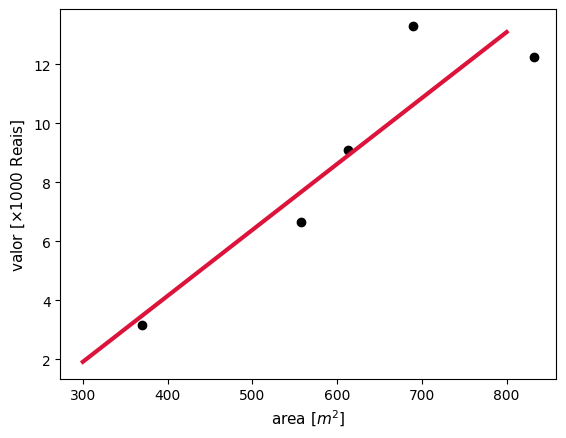

In [116]:
plt.scatter(X1[:,1],y, color = 'black')
area = np.linspace(300,800,2)
y_area = w[0]+w[1]*area
plt.plot(area,y_area, color = 'crimson',linewidth = 3)
plt.xlabel(r'area $[m^2]$', fontsize=11)
plt.ylabel(r'valor [$\times 1000$ Reais]', fontsize=11)
plt.show;

In [114]:
# vetor w* considerando todas as características
X = np.array([[1,689,4,2,3],[1,832,4,4,4],[1,613,4,2,2],[1,557,3,2,3],[1,370,2,2,1]])
y=np.array([13.300,12.250,9.100,6.650,3.150])

In [177]:
import numpy as np

# Dados de entrada
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 3, 4, 5, 6])

# Adicionando uma coluna de uns para o termo de bias
X_b = np.c_[np.ones((5, 1)), X]

# Calculando w usando a fórmula de mínimos quadrados ordinários
w_formula = np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))
print("w (fórmula):", w_formula)

# Calculando w usando o gradiente descendente
w_gradient = np.random.randn(2,1) # inicialização aleatória
eta = 0.001 # taxa de aprendizado
n_iterations = 1000

for iteration in range(n_iterations):
    gradients = 2/5 * X_b.T.dot(X_b.dot(w_gradient) - y)
    w_gradient = w_gradient - eta * gradients

print("w (gradiente):", w_gradient)

w (fórmula): [1. 1.]
w (gradiente): [[0.9784509  1.31617489 1.65389887 1.99162286 2.32934684]
 [0.28295272 0.46639256 0.64983239 0.83327223 1.01671206]]


In [43]:
# vetor w* considerando somente a dimensão da casa
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
print("w0: " + str(w[0]) + " w1: " + str(w[1]) + " w2: " + str(w[2]) + "  w3: " + str(w[3])+ "  w4: " + str(w[4]))

w0: -4.694329896909746 w1: 0.11907216494844867 w2: -9.067525773195257  w3: -6.61391752577236  w4: -4.84948453608218


Lembrando nossa tabela,

Casa  | Dimensão $(m^2)$ |# Quartos |# Banheiros |Idade (anos)| Preço $(US\$/10^6)$
------|------------------|----------|----------|------------|-------------------
01    | 689              | 4        | 2        |   3       | 13.300
02    | 832              | 4        | 4        |   4       | 12.250
03    | 613              | 4        | 2        |   2       | 9.100
04    | 557              | 3        | 2        |   3       | 6.650
04    | 370              | 2        | 2        |   1       | 3.150

Agora temos a seguinte expressão para encontrar o valor de uma casa:
$$
Preço = w0 + w1 \times Dimensão +w2 \times Quartos + w3 \times Banheiros + w4 \times Idade
$$

Vamos testar os valores...

In [44]:
Preco = np.dot(X,w)
print(Preco)

[13.3  12.25  9.1   6.65  3.15]


<center><img src='https://drive.google.com/uc?export=view&id=1u9QRq9uYx1m0hhcG2twE5R-z4LAWov4F' width="200"></center>

Sério???

In [161]:
-4.694329896909746 + 0.11907216494844867*689 -9.067525773195257*4 -6.61391752577236 * 2 -4.84948453608218*3

13.299999999999105

In [160]:
df = pd.read_csv('data.csv')
df.head(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [161]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [162]:
unique_values = df.apply(lambda x: x.unique())
print(unique_values)


date             [2014-05-02 00:00:00, 2014-05-03 00:00:00, 201...
price            [313000.0, 2384000.0, 342000.0, 420000.0, 5500...
bedrooms         [3.0, 5.0, 4.0, 2.0, 6.0, 7.0, 9.0, 1.0, 8.0, ...
bathrooms        [1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3....
sqft_living      [1340, 3650, 1930, 2000, 1940, 880, 1350, 2710...
sqft_lot         [7912, 9050, 11947, 8030, 10500, 6380, 2560, 3...
floors                              [1.5, 2.0, 1.0, 2.5, 3.0, 3.5]
waterfront                                                  [0, 1]
view                                               [0, 4, 1, 2, 3]
condition                                          [3, 5, 4, 2, 1]
sqft_above       [1340, 3370, 1930, 1000, 1140, 880, 1350, 2710...
sqft_basement    [0, 280, 1000, 800, 860, 1010, 360, 690, 470, ...
yr_built         [1955, 1921, 1966, 1963, 1976, 1938, 1989, 198...
yr_renovated     [2005, 0, 1992, 1994, 2010, 1988, 2009, 1969, ...
street           [18810 Densmore Ave N, 709 W Blaine St, 26206

In [163]:
X_df = df.drop(['date', 'street', 'city', 'statezip', 'country', 'price'], axis=1)
Y_df = df['price']


In [164]:
X_df.insert(0, 'Ones', 1)
X_df.head(5)

Ones  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0     1       3.0       1.50         1340      7912     1.5           0     0   
1     1       5.0       2.50         3650      9050     2.0           0     4   
2     1       3.0       2.00         1930     11947     1.0           0     0   
3     1       3.0       2.25         2000      8030     1.0           0     0   
4     1       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0          3        1340              0      1955          2005  
1          5        3370            280      1921             0  
2          4        1930              0      1966             0  
3          4        1000           1000      1963             0  
4          4        1140            800      1976          1992

In [165]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.25, random_state=42)


In [166]:
import numpy as np
def calculate_metrics(predictions, targets):
    mae = np.mean(np.abs(predictions - targets))
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    ssr = np.sum((predictions - targets) ** 2)
    sst = np.sum((targets - np.mean(targets)) ** 2)
    r2 = 1 - (ssr / sst)
    
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    
    return mae, mse, rmse, r2


In [167]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values 
y_test = y_test.values


In [168]:
w = np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train))
w

array([ 5.05326448e+06, -2.60069837e+04, -3.53557583e+04,  5.88341668e+02,
        4.37776377e-01,  3.63246085e+05,  1.58252643e+06, -2.03245816e+03,
       -2.33655304e+04, -5.57212686e+02, -3.75440808e+02, -2.67106216e+03,
        5.52764550e+00])

In [169]:
y_pred = np.dot(X_test,w)

calculate_metrics(y_pred, y_test)

MAE: 370906.3082285781
MSE: 960570021308.0432
RMSE: 980086.7417264878
R2: -0.14039174147303846


(370906.3082285781, 960570021308.0432, 980086.7417264878, -0.14039174147303846)

In [152]:
for i in range(10):
    print(f'{y_pred[i], y_test[i]}')

(92688.42933298124, 544000.0)
(82280.91691677191, 0.0)
(695577.0018934512, 1712500.0)
(686221.4428254728, 365000.0)
(297119.8869697846, 275000.0)
(602834.2096470692, 625000.0)
(324699.4274691357, 453000.0)
(231583.36408615706, 300000.0)
(321737.00948645774, 417985.714286)
(340163.20927542506, 672500.0)


# Gradiente descendente

Gradiente descendente é o coração e a alma da maioria dos algoritmos aprendizado de máquina. É longe a estratégia de otimização mais popular usada em aprendizado de máquina e aprendizado profundo no momento.

Ele é usado no treinamento de modelos de dados, pode ser combinado com todos os algoritmos e é fácil de entender e implementar. Todos que trabalham com aprendizado de máquina devem entender seu conceito.

O Gradiente Descendente (GD) é um algoritmo utilizado para encontrar o mínimo de uma função de forma iterativa.

![Wall-E](https://drive.google.com/uc?export=view&id=1CYGNFXo5ZF3MkPHtDzjBm40D85TFXTsd)


Para entender como funciona o gradiente descendente, considere uma função multivariável $f(\boldsymbol{\omega})$, onde $\boldsymbol{\omega} = [\omega_1, \omega_2, \ldots, \omega_n]^T$. Para encontrar o $\boldsymbol{\omega}$ em que esta função atinge um mínimo, o método do gradiente descendente usa as seguintes etapas:

1. Escolha um valor aleatório inicial de $\boldsymbol{\omega}$;
2. Escolha o número de iterações máximas $T$;
3. Escolha um valor para a taxa de aprendizado $\alpha$
4. Repita os seguintes passos até que $f$ não mude mais ou até que as iterações excedam $T$
 * Calcular: $\Delta \boldsymbol{\omega} = - \alpha \boldsymbol{J}_\boldsymbol{\omega}\left(f(\boldsymbol{\omega})\right) $
 * Atualizar: $\boldsymbol{\omega}\leftarrow \boldsymbol{\omega} + \Delta \boldsymbol{\omega}$

Aqui $\boldsymbol{J}_\boldsymbol{\omega} $ denota o Jacobiano de $f(\boldsymbol{\omega}) $ dado por:
$$
\boldsymbol{J}_\boldsymbol{\omega}\left(f(\boldsymbol{\omega})\right)  =
\begin{bmatrix}
\frac{\partial f(\boldsymbol{\omega})}{\partial \omega_1} \
\frac{\partial f(\boldsymbol{\omega})}{\partial \omega_2} \
\cdots\ \frac{\partial f(\boldsymbol{\omega})}{\partial \omega_n}
\end{bmatrix}
$$

Por exemplo, se considerarmos a seguinte função:
$$
f(\omega_1,\omega_2) = \omega_1^2+\omega_2^2,
$$
a cada iteração, o vetor $\boldsymbol{\omega}$ é atualizado como:
$$
\begin {bmatrix}
\omega_1 \ \omega_2
\end {bmatrix} \leftarrow
\begin {bmatrix}
\omega_1 \ \omega_2
\end {bmatrix} - \alpha
\begin {bmatrix}
2\omega_1 \ 2\omega_2
\end {bmatrix}
$$

## Exercício dos slides

Encontre os mínimos locais da função $f(\omega)=(\omega+5)^2$ começando no ponto $\omega=3$.

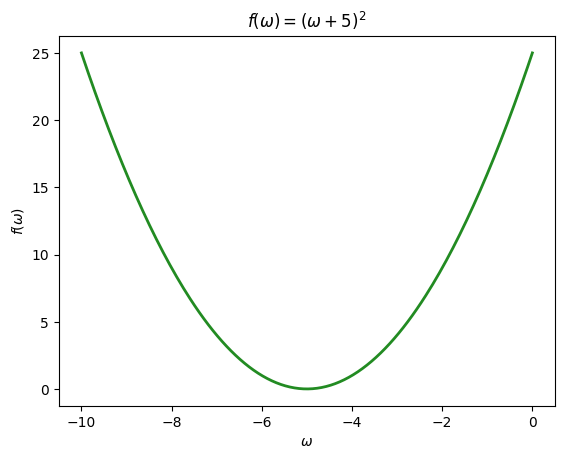

In [153]:
fig = plt.figure()
w = np.linspace(-10, 0, 200)
y = (w+5)**2
plt.title(r'$f(\omega)=(\omega+5)^2$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$f(\omega)$')
plt.plot(w, y, color = 'forestgreen', linewidth = 2)
plt.show()

In [154]:
# Inicialização de parâmetros
w0 = 3                 # valor inicial
alfa = 0.01            # taxa de aprendizado
T = 10000              # máximo número de iterações
eps = 1e-6             # precisado
iters = 0              # contador de iterações
f = lambda w: (w+5)**2 # gradiente da função
df = lambda w: 2*(w+5) # gradiente da função
step = 1e9             # valo

In [155]:
fw=[]
while step > eps and iters < T:
    w1 = w0 - alfa * df(w0)                        # Grad descendente
    step = abs(w1 - w0)                            # Passo de w
    iters = iters+1                                # Contador de iterações
    print("Iter ",iters,"\nX valor ",w1)  # Print iterações
    w0 = w1                                        # valor atual de w é armazenado em valor prévio de w
    fw.append([iters,w1,f(w1)])
fw = np.array(fw)
print("O mínimo local ocorre em", w1)

Iter  1 
X valor  2.84
Iter  2 
X valor  2.6832
Iter  3 
X valor  2.529536
Iter  4 
X valor  2.37894528
Iter  5 
X valor  2.2313663744
Iter  6 
X valor  2.0867390469119997
Iter  7 
X valor  1.9450042659737599
Iter  8 
X valor  1.8061041806542846
Iter  9 
X valor  1.669982097041199
Iter  10 
X valor  1.5365824551003748
Iter  11 
X valor  1.4058508059983674
Iter  12 
X valor  1.2777337898784
Iter  13 
X valor  1.152179114080832
Iter  14 
X valor  1.0291355317992152
Iter  15 
X valor  0.9085528211632309
Iter  16 
X valor  0.7903817647399662
Iter  17 
X valor  0.6745741294451669
Iter  18 
X valor  0.5610826468562635
Iter  19 
X valor  0.44986099391913825
Iter  20 
X valor  0.3408637740407555
Iter  21 
X valor  0.23404649855994042
Iter  22 
X valor  0.1293655685887416
Iter  23 
X valor  0.026778257216966764
Iter  24 
X valor  -0.07375730792737258
Iter  25 
X valor  -0.1722821617688251
Iter  26 
X valor  -0.2688365185334486
Iter  27 
X valor  -0.36345978816277963
Iter  28 
X valor  -0.456190

Os gráficos abaixo plotam a iteração pelo valor de $f(\omega)$ e de $\omega$. Pode-se perceber que há convergência do método após, aproximadamente, 300 iterações. Porém, dado o alto valor de precisão que selecionamos

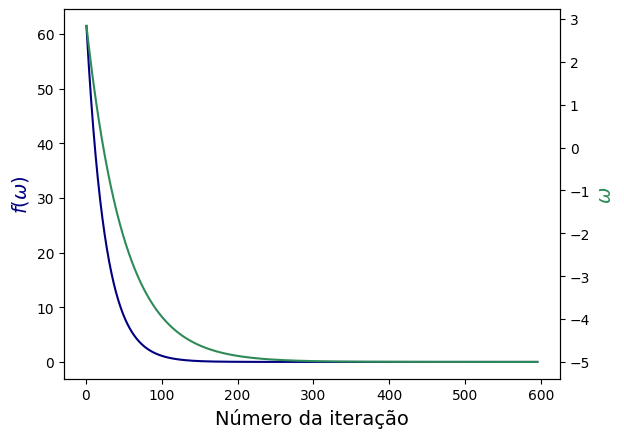

In [156]:
fig,ax = plt.subplots()

ax.plot(fw[:,0], fw[:,2], color='navy' )
ax.set_xlabel('Número da iteração',fontsize=14)
ax.set_ylabel(r'$f(\omega)$',color='navy',fontsize=14)

ax2=ax.twinx()

ax2.plot(fw[:,0], fw[:,1], color='seagreen' )
ax2.set_ylabel(r'$\omega$',color='seagreen',fontsize=14)
plt.show()


A função abaixo serve para ilustrar um dos problemas do Gradiente Descendente.

*A descida do gradiente é um Método de Otimização de Primeira Ordem. Leva em consideração apenas as derivadas de primeira ordem da função e despreza as de mais altas ordens. O que isso significa basicamente é que o método não tem idéia sobre a curvatura da função. Ele pode dizer se a função está diminuindo e quão rápido, mas não pode diferenciar se a curva é um plano, uma curva para cima ou para baixo.*

In [ ]:
def makeplot(position,angle1,angle2,rotation,alpha):
    ax = fig.add_subplot(position,projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha = alpha)
    ax.view_init(angle1,angle2)
    ax.set_xlabel(r'$x_1$', fontsize=15, labelpad=10)
    ax.set_ylabel(r'$x_2$', fontsize=15, labelpad=10)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$L^1$', rotation=rotation, fontsize=16, labelpad=10)
    return ax

In [ ]:
X,Y = np.meshgrid(np.arange(-2, 8, .1), np.arange(-2, 8, .1))
Z = np.sin(X)-Y/10

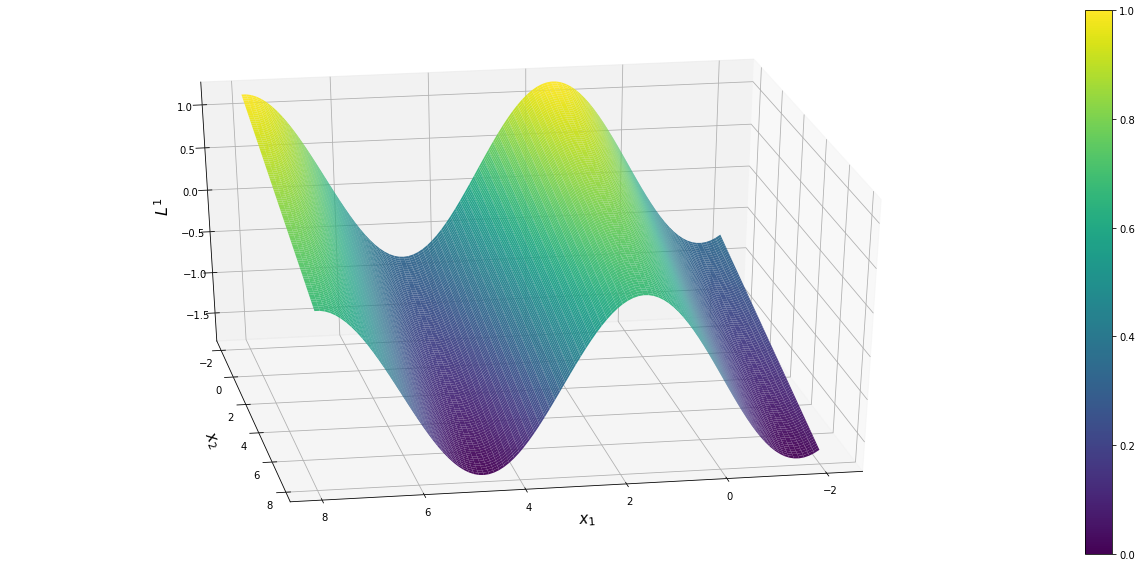

In [ ]:
fig = plt.figure(figsize=(50,10))
ax = makeplot(121,30,80,90,0.95)
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax = ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'facecolors'
  This is separate from the ipykernel package so we can avoid doing imports until


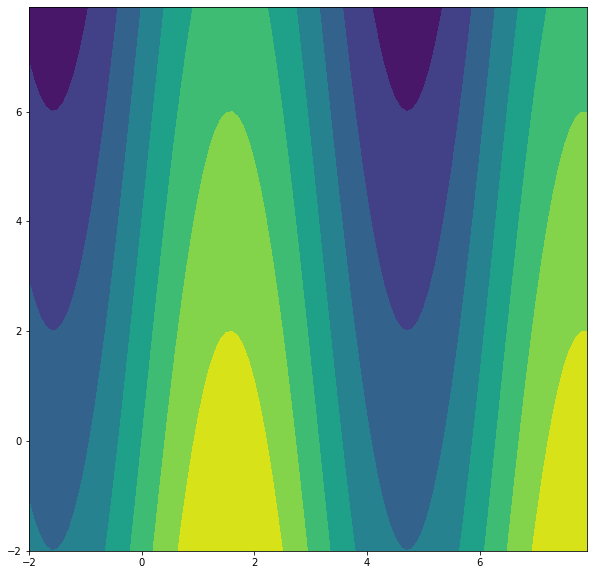

In [ ]:
colors = mpl.cm.jet(np.hypot(X,Y))
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(X,Y,Z, facecolors=colors)

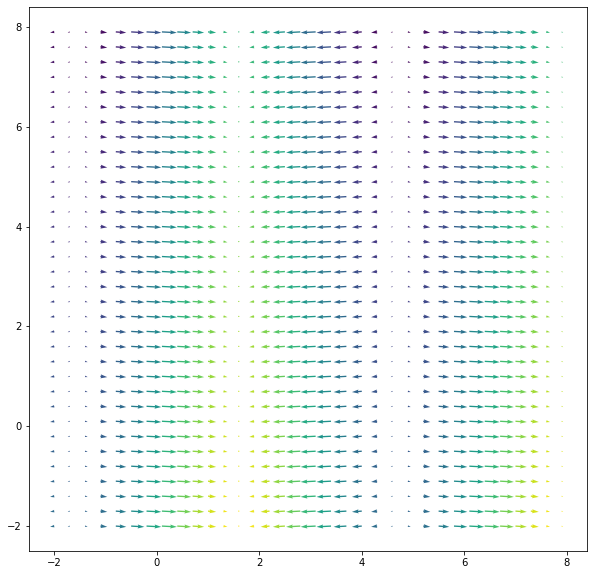

In [ ]:
X,Y = np.meshgrid(np.arange(-2, 8, .3), np.arange(-2, 8, .3))
Z = np.sin(X)-Y/10
V,U = np.gradient(Z, .2, .1)
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap()
q = ax.quiver(X,Y,U,V, Z, cmap = 'viridis')
plt.show()

# Gradiente descendente com Momentum

O Momentum propõe o seguinte ajuste para a descida gradiente.
$$
𝑚=\beta 𝑚−\alpha 𝐽(\omega^{(j)})
$$
$$
\omega^{(j+1)} = \omega^{(j)} + 𝑚
$$
onde $𝑚$ é o gradiente que é mantido nas iterações anteriores. Este gradiente retido é multiplicado por um valor denominado *Coeficiente de Momentum* $\beta$, que é a porcentagem do gradiente retido a cada iteração. Em geral, adota-se $\beta=0,9$.


In [ ]:
# Inicialização de parâmetros
w0 = 3                 # valor inicial
alfa = 0.01            # taxa de aprendizado
beta = 0.4             # coeficiente de momentum
T = 10000              # máximo número de iterações
eps = 1e-6             # precisado
iters = 0              # contador de iterações
f = lambda w: (w+5)**2 # gradiente da função
df = lambda w: 2*(w+5) # gradiente da função
step = 1e9

In [ ]:
fw=[]
m = 0
while step > eps and iters < T:
    m = beta*m - alfa * df(w0)                     #m
    w1 = w0 + m                                      # Grad descendente
    step = abs(w1 - w0)                            # Passo de w
    iters = iters+1                                # Contador de iterações
    print("Iter ",iters,"\nX valor ",w1)  # Print iterações
    w0 = w1                                        # valor atual de w é armazenado em valor prévio de w
    fw.append([iters,w1,f(w1)])
fw = np.array(fw)
print("O mínimo local ocorre em", w1)

Iter  1 
X valor  2.84
Iter  2 
X valor  2.6191999999999998
Iter  3 
X valor  2.3784959999999997
Iter  4 
X valor  2.1346444799999995
Iter  5 
X valor  1.8944109823999995
Iter  6 
X valor  1.6604293637119996
Iter  7 
X valor  1.4336281289625594
Iter  8 
X valor  1.2142350724835322
Iter  9 
X valor  1.0021931484422506
Iter  10 
X valor  0.7973325158568929
Iter  11 
X valor  0.599441612505612
Iter  12 
X valor  0.40829641891498736
Iter  13 
X valor  0.22367241310043776
Iter  14 
X valor  0.045349362512609154
Iter  15 
X valor  -0.12688684497277447
Iter  16 
X valor  -0.29324359106747244
Iter  17 
X valor  -0.4539214176840022
Iter  18 
X valor  -0.6091141199769341
Iter  19 
X valor  -0.7590089184945682
Iter  20 
X valor  -0.9037866595317304
Iter  21 
X valor  -1.0436220227559607
Iter  22 
X valor  -1.1786837275905335
Iter  23 
X valor  -1.309134734972552
Iter  24 
X valor  -1.4351324432259083
Iter  25 
X valor  -1.5568288776627326
Iter  26 
X valor  -1.6743708738842078
Iter  27 
X valor  

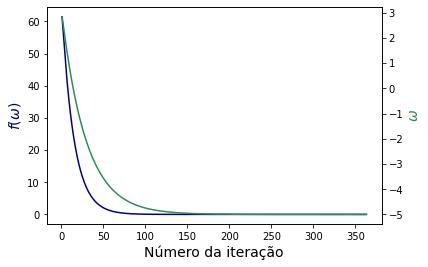

In [ ]:
fig,ax = plt.subplots()

ax.plot(fw[:,0], fw[:,2], color='navy' )
ax.set_xlabel('Número da iteração',fontsize=14)
ax.set_ylabel(r'$f(\omega)$',color='navy',fontsize=14)

ax2=ax.twinx()

ax2.plot(fw[:,0], fw[:,1], color='seagreen' )
ax2.set_ylabel(r'$\omega$',color='seagreen',fontsize=14)
plt.show()

# Lição de casa

Use o Gradiente descendente com momentum e ache o vetor $\mathbf \omega$ para a regressão linear do conjunto de dados da tabela abaixo. Na equação,
$$
y = \omega_0 + \omega_1\times x_1 + w_2 \times x_2
$$
$𝑦$ é a taxa de gordura no sangue, $\omega_i$ são os pesos e $x_i$ os dados de entrada.

import numpy as np

data = np.array([
    [1, 84, 46, 354],
    [2, 73, 20, 190],
    [3, 65, 52, 405],
    [4, 70, 30, 263],
    [5, 76, 57, 451],
    [6, 69, 25, 302],
    [7, 63, 28, 288],
    [8, 72, 36, 385],
    [9, 79, 57, 402],
    [10, 75, 44, 365],
    [11, 27, 24, 209],
    [12, 89, 31, 290],
    [13, 65, 52, 346],
    [14, 57, 23, 254],
    [15, 59, 60, 395],
    [16, 69, 48, 434],
    [17, 60, 34, 220],
    [18, 79, 51, 374],
    [19, 75, 50, 308],
    [20, 82, 34, 220],
    [21, 59, 46, 311],
    [22, 67, 23, 181],
    [23, 85, 37, 274],
    [24, 55, 40, 303],
    [25, 63, 30, 244]
])

print(data)

Índice  | Peso $(Kg)$  |Idade (anos)| Taxa de Gordura no sangue
--------|--------------|------------|--------------------------
 1  |  84 | 46 | 354
 2  |  73 | 20 | 190
 3  |  65 | 52 | 405
 4  |  70 | 30 | 263
 5  |  76 | 57 | 451
 6  |  69 | 25 | 302
 7  |  63 | 28 | 288
 8  |  72 | 36 | 385
 9  |  79 | 57 | 402
10  |  75 | 44 | 365
11  |  27 | 24 | 209
12  |  89 | 31 | 290
13  |  65 | 52 | 346
14  |  57 | 23 | 254
15  |  59 | 60 | 395
16  |  69 | 48 | 434
17  |  60 | 34 | 220
18  |  79 | 51 | 374
19  |  75 | 50 | 308
20  |  82 | 34 | 220
21  |  59 | 46 | 311
22  |  67 | 23 | 181
23  |  85 | 37 | 274
24  |  55 | 40 | 303
25  |  63 | 30 | 244
